In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data_path = "data/mouse_drug_data.csv"
clinical_data_path = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_data_path)

clinical_df = pd.read_csv(clinical_data_path)

# Combine the data into a single dataset Merge the first two datasets on "Mouse ID" so that no data is lost 
combined_df = pd.merge(mouse_df, clinical_df,
                                 how='outer', on='Mouse ID')
#visualize data
display(
   "Clinical_df", clinical_df.shape,
    "Mouse_df" , mouse_df.shape,
    "Combined_df" , combined_df.shape,
    mouse_df.head(),
    clinical_df.head()
)

# Combine the data into a single dataset Merge the first two datasets on "Mouse ID" so that no data is lost 
combined_df = pd.merge(mouse_df, clinical_df,
                                 how='outer', on='Mouse ID')



# Display the data table for preview (Why did it get 15 rows longer??)
combined_df


'Clinical_df'

(1893, 4)

'Mouse_df'

(250, 2)

'Combined_df'

(1906, 5)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


Text(0, 0.5, 'Count')

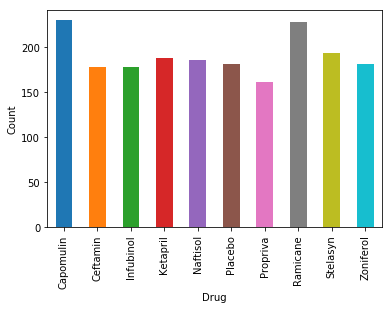

In [2]:
drug_group = combined_df.groupby('Drug')
drug_group_counts = drug_group['Drug'].count()

drug_chart = drug_group_counts.plot(kind='bar')

drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Count")



In [10]:

combined_df_mean = combined_df.groupby(['Drug', 'Timepoint']).mean()

combined_df_n = combined_df.groupby(['Drug', "Timepoint"]).count()

#dfNew = df.merge(df2, left_index=True, right_index=True,

combined_df_n = combined_df_n.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites'])

combined_df_n = combined_df_n.rename(columns={"Mouse ID": "n"})

#add 'n' values to df 

combined_df_mean['n'] = combined_df_n.iloc[:,0].values
    
#add Sem

combined_df_mean

display(combined_df_mean.head(),
        combined_df_n
       )
        
        


Tumor Volume (mm3)  Metastatic Sites   n
Drug      Timepoint                                          
Capomulin 0                   45.000000          0.000000  25
          5                   44.266086          0.160000  25
          10                  43.084291          0.320000  25
          15                  42.064317          0.375000  24
          20                  40.716325          0.652174  23

n
Drug      Timepoint    
Capomulin 0          25
          5          25
          10         25
          15         24
          20         23
          25         22
          30         22
          35         22
          40         21
          45         21
Ceftamin  0          25
          5          21
          10         20
          15         19
          20         18
          25         18
          30         16
          35         14
          40         14
          45         13
Infubinol 0          25
          5          25
          10         21
          15         21
          20         20
          25         18
          30         17
          35         12
          40         10
          45          9
...                  ..
Ramicane  0          25
          5          25
          10         24
          15         24
          20         23
          25         23
          30         23
          35         21
          40         20
          45         20
Stelasyn  0          26
          5          25
          10         23
          15         23
          20         21
          25         19
          30         18
          35         16
          40         12
          45         11
Zoniferol 0          25
          5          24
          10         22
          15         21
          20         17
          25         16
          30         15
          35         14
          40         14
          45         14

[100 rows x 1 columns]

In [4]:

# Bin the Purchasing Data
#purchase_data["Age Ranges"] = pd.cut(purchase_data["Age"], age_bins, labels=group_names)

# Run basic calculations
#age_purchase_total = purchase_data.groupby(["Age Ranges"]).sum()["Price"].rename("Total Purchase Value")
#age_average = purchase_data.groupby(["Age Ranges"]).mean()["Price"].rename("Average Purchase Price")
#age_counts = purchase_data.groupby(["Age Ranges"]).count()["Price"].rename("Purchase Count")

# Calculate Normalized Purchasing (Average Purchase Total per Person)
#normalized_total = age_purchase_total / age_demographics["Total Count"]

# Convert to DataFrame
#age_data = pd.DataFrame({"Purchase Count": age_counts, "Average Purchase Price": age_average, "Total Purchase Value": age_purchase_total, "Normalized Totals": normalized_total})
Placebo_df.head()

NameError: name 'Placebo_df' is not defined

In [ ]:
#Make a DF for each treatment
#Placebo_df = combined_df[combined_df['Drug']=='Placebo']
#Capomulin_df = combined_df[combined_df['Drug']=='Capomulin']
#Infubinol_df = combined_df[combined_df['Drug']=='Infubinol']
#Ketapril_df = combined_df[combined_df['Drug']=='Ketapril']

#Store Mean tumor volume by timepoint for each treatment 
#Placebo_0_mean = Placebo_df[Placebo_df['Timepoint']==0].groupby(['Tumor Volume (mm3)']).mean()
#x = Placebo_df[Placebo_df['Timepoint']== 5].groupby(['Tumor Volume (mm3)']).agg('sum')
#Placebo_df[Placebo_df['Timepoint']==10].groupby(['Tumor Volume (mm3)']).mean()
#Placebo_df[Placebo_df['Timepoint']==15].groupby(['Tumor Volume (mm3)']).mean()
##Placebo_time_df = Placebo_df[Placebo_df['Timepoint']==0]
##Placebo_0_sum = Placebo_time_df['Tumor Volume (mm3)'].agg(['sum'])
##Placebo_0_mean = Placebo_0_sum / len(Placebo_time_df)
#Placebo_0_mean 


## Tumor Response to Treatment

In [ ]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

combined_df_mean = combined_df.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
combined_df_mean.head()
# Preview DataFrame


In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

display(combined_df_mean.head())
        
      
for index, row in combined_df_mean.iterrows():
    print(row['Tumor Volume (mm3)'])
# Convert to DataFrame

# Preview DataFrame



In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()